<a href="https://colab.research.google.com/github/ayrna/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Los bloques de construcción matemáticos del aprendizaje profundo (parte I)

En este cuaderno vamos a ver:

* Un ejemplo de red neuronal
* El concepto de tensor y operaciones con tensores
* Cómo las redes neuronales aprenden a través del algoritmo de retropropagación y el descenso por gradiente

**EJERCICIOS: Durante este cuaderno de prácticas verás ejercicios y preguntas marcadas con ❓❓❓. Puedes contestar añadiendo nuevos bloques de texto (breve) y/o código a continuación de la pregunta.**


Este cuaderno está basado en los cuadernos del libro [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff).

> This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

> **If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

> This notebook was generated for TensorFlow 2.6.

# Los bloques de construcción matemáticos de las redes neuronales

Vamos a hacer el típico ejemplo de clasificación de dígitos implementando una red neuronal básica en Keras. Para ello utilizaremos la famosa base de datos MNIST que contiene imágenes en escala de gris de dígitos escritos a mano (28x28 píxeles) que se agrupan en 10 categorías.

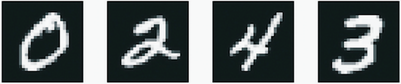

## Un primer vistazo a una red neuronal

### Cargando la base de datos MNIST en Keras

El conjunto de datos MNIST viene precargado en Keras como un `NumPy array`

In [1]:
%matplotlib inline
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Veamos las características de los datos de entrenamiento:

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Y los datos de test:

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Arquitectura de la red

El bloque principal para definir una red neuronal es la `capa` (`layer`). Podemos ver las capas como una forma de filtrado de datos donde estos se van transformando progresivamente. Cada capa extrae *representaciones* de los datos que se espera que sean significativas para el problema.

En este caso tenemos una secuencia de dos capas `densas` (`Dense`), que significa que están conectadas completamente (*densamente*).

La última capa, es una capa de *clasificación softmax* con 10 salidas de probabilidades de pertenencia a cada clase (entre las 10 suman 1).

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

### La compilacion del modelo

Para que podamos entrenar el modelo este debe *compilarse*, y para ello debemos elegir:
* **optimizador**
* **función de pérdida** (*loss function*)
* **métricas de rendimiento**

In [9]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


### Preparación de los datos de imágenes

Necesitamos transformar nuestra matriz de datos `(60000, 28, 28)` del tipo `uint8` en el intervalor `[0, 255]` a valores reales `float32` en `[0,1]` con una matriz de dimensiones `(60000, 28 * 28)`. Nuestra red de ejemplo necesita que los datos de los patrones estén en un vector por patrón.


In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

Nuevo formato de las mastrices:

In [11]:
train_images.shape

(60000, 784)

In [12]:
test_images.shape

(10000, 784)

### "Ajustando" el modelo

Ya estamos listo para entrenar el modelo, que en Keras, como en muchos otros *framworks* se hace con el método `fit()`: *ajustamos* el modelo a los datos de entrenamiento.

Nota: El siguiente código tardará en ejecutarse unos segundos/minutos:

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 8ms/step - loss: 0.4739 - accuracy: 0.8711
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2433 - accuracy: 0.9301
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1977 - accuracy: 0.9441
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1701 - accuracy: 0.9513
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1499 - accuracy: 0.9568


---
❓❓❓ :
**EJERCICIO**: ¿Sabrías interpretar las cantidades que se van imprimiendo?
❓❓❓

Ambas son valores que miden el rendimiento y evolución del modelo conforme se va entrenando.

Loss es la función de pérdida, que mide los errores entre las predicciones del modelo y los valores reales de los datos de entrenamiento y debería ir disminuyendo. Se utiliza para ir calculando los cambios en la función de optimización.

Accuracy es la métrica utilizada en este caso para medir y monitorizar el rendimiento del modelo. Accuracy en concreto mide la precisión que tiene el modelo para predecir correctamente las instancias, y debe ir incrementando con el tiempo.

---

❓❓❓ **EJERCICIO**: Prueba a cambiar el número de unidades en la capa oculta. ¿Qué sucede?¿Cómo puedes mejorarlo? ❓❓❓


In [75]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"), # Esta es la capa oculta que se modifica
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2943 - accuracy: 0.9171
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1283 - accuracy: 0.9628
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0868 - accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0648 - accuracy: 0.9805
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0509 - accuracy: 0.9854


La pérdida ha disminuido y el accuracy ha aumentado en comparación con el primer modelo entrenado. Esto ya mejora al primer modelo y es lo que se busca al realizar entrenamientos de modelos.

Sin embargo, habría que estudiar si está habiendo over-fitting, y en el caso de ser así, estudiar si es lo que queremos conseguir para el problema a resolver (¿necesitamos un modelo que generalice muy bien o no?). En el caso de necesitar un modelo con buena capacidad de generalización el over-fitting no es lo deseable, por lo que sería necesario buscar métodos para evitarlo.

Otro problema que puede ocurrir es el cuello de botella, de una cantidad muy grande de neuronas se pasa a uno más pequeño. En este caso parece que no ha afectado muy negativamente pero aumentando a mucho más sí que se podrían experimentar efectos negativos, además de llevar más tiempo de computación al tratarse de una capa densa:

In [87]:
model = keras.Sequential([
    layers.Dense(1028, activation="relu"), # Esta es la capa oculta que se modifica
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 13s 26ms/step - loss: 0.2421 - accuracy: 0.9294
Epoch 2/5
469/469 [==============================] - 10s 20ms/step - loss: 0.0923 - accuracy: 0.9723
Epoch 3/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0594 - accuracy: 0.9818
Epoch 4/5
469/469 [==============================] - 11s 24ms/step - loss: 0.0415 - accuracy: 0.9875
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.0295 - accuracy: 0.9909


### Visualizar el modelo

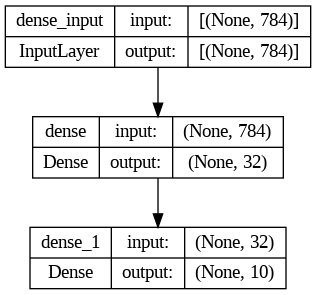

In [14]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Hacer predicciones con nuestro modelo

Una vez el modelo ha sido ajustado/entrenado podemos utilizarlo para predecir las propbabilidades de nuevos dígitos que no fueron utilizados durante el entrenamiento y reservamos en el conjunto de *test*.

En el siguente código cada posición `i` del vector de predicciones corresponde a la probabilidad de que la imagen `test_digits[0]` pertenezca a la clase `i`.

In [16]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 124ms/step


array([1.16385163e-05, 4.99390431e-08, 6.21228100e-05, 7.27574574e-04,
       5.79197319e-07, 3.85476824e-06, 5.51795720e-10, 9.99078393e-01,
       3.80897586e-06, 1.11938636e-04], dtype=float32)

Para este primer patrón de test, el índice `i` con mayor probabilidad, `0.99999106` para `7` en nuestro caso, es la clase estimada por nuestro modelo, por tanto debe ser un 7.

In [17]:
predictions[0].argmax()

7

In [18]:
predictions[0][7]

0.9990784

Podemos constrastar la predicción del modelo con la etiqueta del patrón:

In [19]:
test_labels[0]

7

### Evaluación del modelo

Para una evaluación más completa, calculamos la precisión global media sobre todo el conjunto de *test*. En  este caso la precisión es ligeramente inferior a la de entrenamiento.

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1491 - accuracy: 0.9537
test_acc: 0.9537000060081482


In [21]:
test_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [22]:
test_pred = test_pred.argmax(axis=1)

---
❓❓❓ **EJERCICIO**: Intenta calcular y visualizar gráficamente la matriz de confusión [adaptando este código de skitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).
❓❓❓


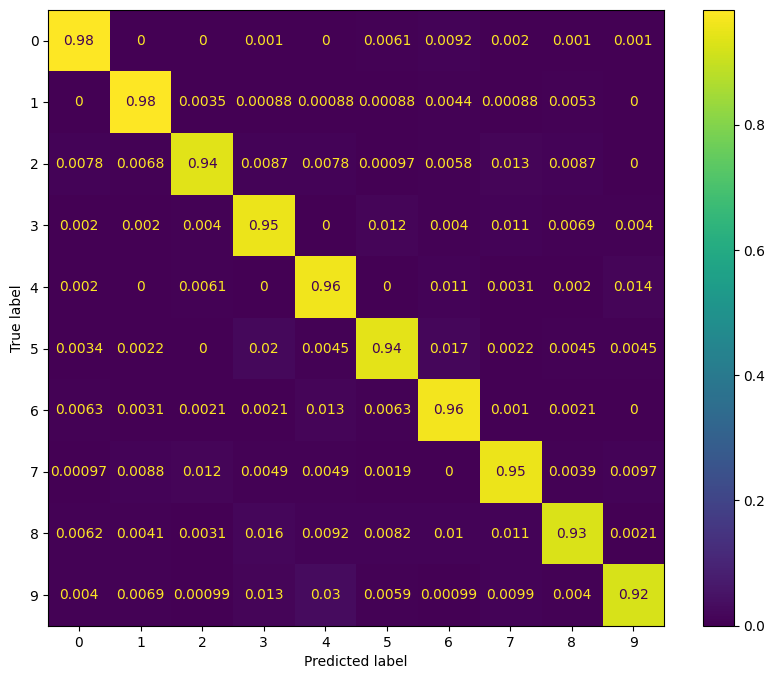

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Ajustar tamaño
plt.rcParams['figure.figsize'] = [10, 8]

conf_matrix = confusion_matrix(test_labels, test_pred, normalize="true")
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()


## Representación de los datos para redes neuronales

Los tensores o *tensors* son el tipo de estructura de datos básico en aprendizaje máquina y en aprendizaje profundo en particular.

Un tensor es un contenedor de datos, habitualmente numéricos. Ejemplos que ya conocemos son las matrices, que son tensores de orden-2 o rango-2 (*rank-2 tensors*). Los tensores son una generalización de las mastrices a un número arbitrario de *dimensiones*, que en el contexto de los tensores se llaman *ejes*.

**Nota de traducción**: *rank* ~ orden, grado o rango.

### Escalares (rank-0 tensors)

Un tensor de un sólo número se llama *escalar* o tensor de rango-0 o tensor 0D (`ndim == 0`).

In [23]:
import numpy as np
x = np.array(12)
x

array(12)

In [24]:
x.ndim

0

### Vectores (rank-1 tensors)

Una matriz de números se llama vector, tensor de orden-1 o tensor 1D. Estos sólo tienen un eje:

In [25]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [26]:
x.ndim

1

Decimos que este vector tiene 5 entradas y se llama vector de 5 dimensiones. No debemos confundir un vector 5D con un tensor 5D. Un vector sólo tiene un eje y tiene 5 dimensiones en él mientras que un tensor 5D tiene 5 ejes y cada eje particular puede tener cualquier número de dimensiones.

### Matrices (rank-2 tensors)

Una matriz es un tensor de orden-2 o 2D que tiene 2 ejes que habitualmente llamanos filas y columnas.

In [27]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Tensores de orden 3 o superior

Si agrupamos varias matrices en un vector obtenemos un tensor de orden 3 o 3D que podemos interpretar como un cubo de números. Por ejemplo:



In [28]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

Si agrupamos tensores de orden 3 en otro vector crearemos un tensor de orden 4.

En aprendizaje profundo lo habitual será trabajar con tensores de orden 0 al 4 o de orden 5 para procesar datos de vídeo.

### Propiedades clave de los tensores

Un tensor queda definido por tres atributos clave:
* Número de ejes (orden o rango o *rank*).
* Forma (*shape*): tupla de enteros que describe cuántas dimensiones hay en cada eje. En los ejemplos anteriores:
 * escalar: forma vacía `()`
 * vector: forma con un único elemento `(5,)`
 * matriz: `(3, 5)`
 * tensor orden 3: `(3, 3, 5)`
* Tipo de datos (`dtype` en las bibliotecas de Python): `float16`, `float32`, `float64`, `uint8`, etc. y `string` en TensorFlow.

En nuestro conjunto de datos MINST:

In [29]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Podemos mostrar el número de ejes, la forma y tipo de datos del tensor `train_images` con el atributo `ndim`, `shape` y `dtype`:

In [30]:
train_images.ndim

3

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_images.dtype

dtype('uint8')

Esto es, tenemos un tensor de orden 3 de enteros de 8 bits compuesto de un vector de 60.000 matrices de 28x28 enteros. Cada matriz es una imagen en escala de grises con coeficientes entre 0 y 255

Podemos ver las imágenes de cada patrón a través de `matplotlib`.

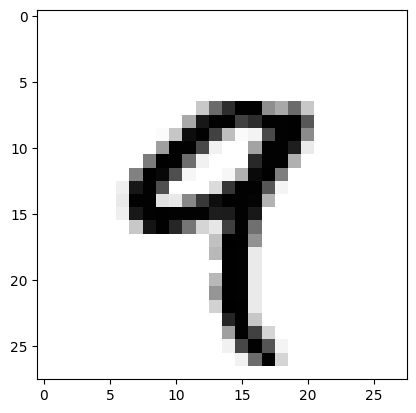

In [33]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [34]:
train_labels[4]

9

### Manipulación de tensores en NumPy

A la selección de elementos de un tensor se le llama *tensor slicing*. Algunos ejemplos.

Seleccionar dígitos del #10 al #100 (#100 no incluído) y guardarlos en una matriz de forma `(90, 28, 28)`:

In [35]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

Expresión equivalente especificando los índices de inicio y fin para cada eje del tensor (`:` equivale a seleccionar un eje entero).

In [36]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [37]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

En general se pueden seleccionar trozos de un tensor entre dos índices de cada eje, por ejemplo, para seleccionar una zona de 14x14 píxeles de la esquina inferior derecha de todas las imágenes:

In [38]:
my_slice = train_images[:, 14:, 14:]

Visualizamos el dígito y su recorte:

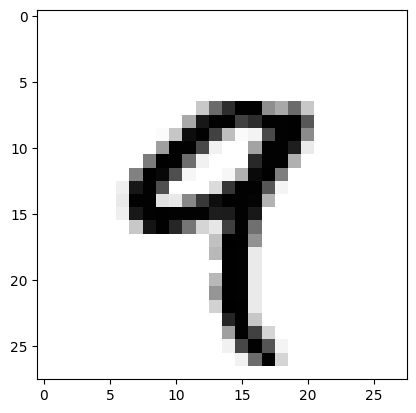

In [39]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

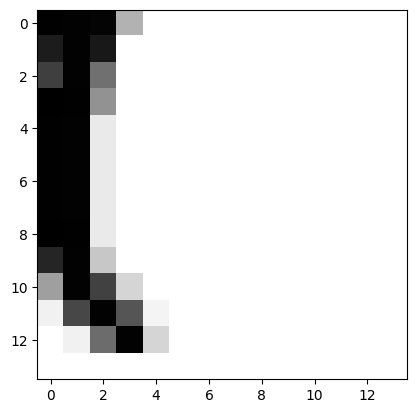

In [40]:
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Se pueden utilizar índices negativos, que indican una posición relativa al final del eje. Por ejemplo, así recortaríamos las imágenes en áreas de 14x14 píxeles centrales:

In [41]:
my_slice = train_images[:, 7:-7, 7:-7]

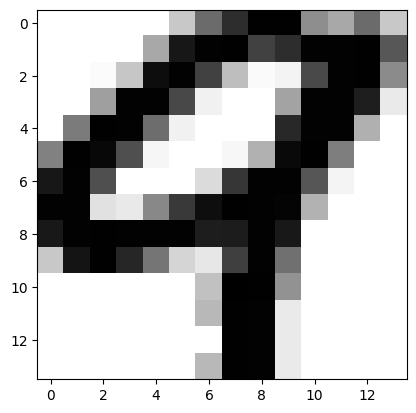

In [42]:
digit = my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Los lotes de datos (*data batches*)

En general, el primer eje (eje 0) en los tensores suele corresponde al eje/dimensión de los patrones o muestras. Los modelos de aprendizaje profundo no procesan conjuntos enteros de datos de una vez, sino que los parten en varios lotes. Un ejemplo de un lote de datos de tamaño 128 en MNIST:

In [43]:
batch = train_images[:128]

Siguientes lotes:

In [44]:
batch = train_images[128:256]

In [45]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

En Keras y otras herramientas se suele referir al eje 0 de estos lotes como *eje/dimensión del lote*.

### Ejemplos reales de tensores de datos

Algunos ejemplos típicos que encontraremos:
* **Vectores de datos**: tensores de orden 2 `(samples, features)` donde cada patrón es un vector de atributos numéricos ('*features*').

* **Series temporales o secuencias de datos**: tensores de orden 3 `(samples, timesteps, features)` donde cada muestra es una secuencia de longiud `timesteps` de vectores de atributos.
* **Imágenes**: tensores de orden 4 `(samples, height, width, channels)` donde cada muestra se compone de tensores 2D de píxeles, y ada pixel está representado por un vector de varios valores ('canales').

### Vectores de datos

 * Datos tabulares de personas (edad, género, renta): `(100000, 3)`
 * Documentos representados por diccionario de aparición/frecuencia de palabras.

### Series temporales y secuencias

Tensor de orden 3 compuesto de una secuencia tensores de orden 2. Ejemplos: datos de precio de acciones donde se guardan 3 valores por minuto, cada día será una matriz `(390, 3)` y 250 días al año se pueden guardar en un tensor de orden 3 `(250, 390, 3)`.

[Fuente imagen Collet 2022]
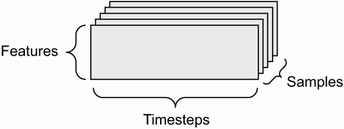

### Datos de imagen

Tensor de orden 4: 128 imágenes de 256x256 píxeles y 3 canales `(128, 256, 256, 3)`

[Fuente imagen Collet 2022]
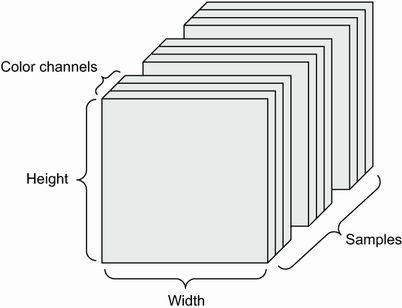

### Datos de vídeo

Un vídeo es una secuencia de fotogramas, que representan con tensores orden 3 `(height, width, color_ depth)`, una secuencia de fotogramas es un tensor de orden 4 `(frames, height, width, color_depth)`. Un lote de vídeos se puede almacenar en un tensor de orden 5 `(samples, frames, height, width, color_depth)` (ej `(4, 240, 144, 256, 3)`).

## Operaciones con tensores

Una capa del tipo que hemos definido:

In [46]:
keras.layers.Dense(512, activation="relu")

Se puede interpretar como una función que toma una matriz como entrada y devuelve otra de salida:

```
output = relu(dot(input, W) + b)
```



Esta función se descompone en tres operaciones con tensores:
* Producto escalar `dot`
* Suma `+`
* Operación `relu` (*rectified linear unit*): `max(x, 0)`

![Rectifier_(neural_networks) en Wikipedia](https://upload.wikimedia.org/wikipedia/commons/4/42/ReLU_and_GELU.svg)

[Fuente [Rectifier_(neural_networks) en Wikipedia](https://en.wikipedia.org/wiki/Rectifier_\(neural_networks\))]


### Operaciones por elementos

Cómo sumar un vector a una matriz. Implementación no vectorizada/paralelizable vs optimizada por NumPy.

In [47]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [48]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

❓❓❓ EJERCICIO: Implementa la transformación `relu` sin utilizar bucles. Puedes usar la función [`np.maximum(a, b)`](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html). Compara el rendimiento implementación con las funciones sin optimizar ❓❓❓

In [84]:
import time
import numpy as np

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.03 s


In [82]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.99 s


Al utilizar las funciones que ya vienen optimizadas se consigue reducir el tiempo de cálculo en mucho tiempo. Puede parecer en un ejemplo así con pocos datos que no es tan importante, pero en el momento de hacer cálculos con un conjunto de datos verdaderamente grande, el tiempo de diferencia entre el uso de funciones sin optimizar y optimizadas es muy considerable.

### Broadcasting

Las funciones anteriores sólo permiten operaciones con tensores 2D con formas idénticas, es decir, no pueden sumar, por ejemplo, una matriz y un vector.

Si los tamaños difieren y no hay ambigüedad, el tensor más pequeño se *emite*/*reforma* para encajar con la forma del tensor mayor. Esto consiste en dos pasos:
1. Se añaden ejes al tensor menor para que tenga la misma `ndim` del mayor.
1. Se repite el tensor a lo largo de los nuevos ejes hasta alcanzar la forma completa del tensor.

Algunas de estas operaciones seán automatizadas por Keras para evitar tener que programar explícitamente las formas de las capas de la red para que sean compatibles entre si.

In [51]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

Añadimos un eje vacío al vector `y`:

In [52]:
print(y.shape)
y = np.expand_dims(y, axis=0)
print(y.shape)

(10,)
(1, 10)


Y repetimos el contenido de `y` 32 veces a lo largo de ese eje de manera que pueden ser sumados por la función. Nótese que los datos realmente no se copian sino que a nivel algorítmico se simula que están repetidos 32 veces, pero esto nos ayuda mentalmente a programar algunas operaciones.  

In [53]:
Y = np.concatenate([y] * 32, axis=0)
print(Y.shape)

(32, 10)


In [54]:
print(Y)

[[0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.9981304  0.01523943 0.18342075]
 [0.77743787 0.82175837 0.7071952  0.94105198 0.13603658 0.1395375
  0.84546952 0.998130

In [55]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [56]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Producto de un tensor o producto escalar

Veamos lo que hace esta operación entre vectores y matriz y vector:

In [57]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [58]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z # Devolvemos un escalar

In [59]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0]) # En este caso devolvemos un vector del tamaño de y
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [60]:
# Reutilizando naive_vector_dot() tenemos un código equivalente
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [61]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

---
❓❓❓ EJERCICIO: compara el rendimiento del [producto escalar (*dot product*)](https://es.wikipedia.org/wiki/Producto_escalar) de la implementación `naive_matrix_dot` frente al producto de tensores. Necesitarás usar las funciones de *broadcasting* que hemos visto ❓❓❓

Prueba con estos datos:
```
X = np.random.random((64, 20))
y = np.random.random((20,))
```



In [84]:
# Saltado durante la clase

### Tensor reshaping

Reformar o reorganizar un tensor para que sus forma encaje con la de deseada. Esto lo hicimos al preprocesar MNIST:

In [62]:
train_images = train_images.reshape((60000, 28 * 28))

Un ejemplo de reorganización de tensores sería:

In [63]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [64]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

Un ejemplo especial de reorganización sería la transposición que significa que una matriz intercambia sus filas y columnas de manera que `x[i, :]` se convierte en `x[:, i]:`

In [65]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

## El motor de las redes neuronales: la optimización por gradiente

### ¿Qué es una derivada?

[Fuente Choller 2022]
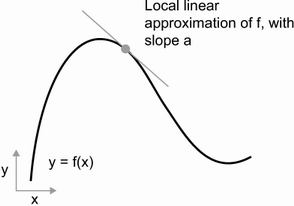

**Derivadas y optimización:** cómo encontrar valores de `x` (multiplicados por un factor episilon) para minimizar `f(x)`. Conocida la derivada de `f` conocemos cómo evoluciona `f(x)` y por tanto mover `x` (en dirección opuesta a la derivada) para minimizarlo.



### Derivada de una operación con tensores: el gradiente

El **gradiente** es la generalización del concepto de derivada a funciones que procesan tensores como entradas. Si para una función escalar la derivada representa la **pendiente** local de la función, el gradiente de una función de tensores representa la **curvatura** de la superficie multidimensional descrita por la función. Al final éste nos dice **cómo cambia la salida de la función según varíen los parámetros de entrada**.


[Fuente Choller 2022]
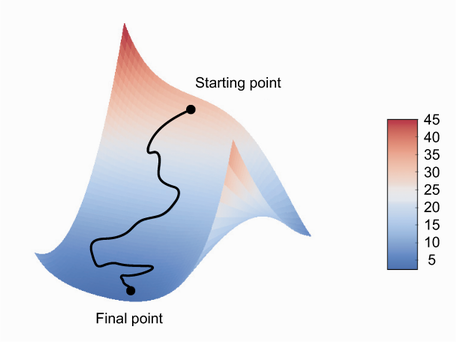

Un ejemplo en el contexto de aprendizaje máquina:
* Vector de entrada `x` (muestra en el conjunto de datos)
* Matriz `W` (los pesos del modelo que queremos ajustar)
* Objetivo `y_true` (lo que el modelo debe aprender a asociar con `x`)
* Función de pérdida `loss` (que mide la distancia entre las predicciones del modelo y `y_true`)


```
y_pred = dot(W, x)
loss_value = loss(y_pred, y_true)
```

Como las entradas `x` y `y_true` son constantes podemos considerar que el valor que minimizamos depende sólo de `W`.


```
loss_value = f(W)
```

Si `W0` es un valor actual de `W`, la derivada de `f` en el punto `W0` es un tensor `grad(loss_value, W0)` con la misma forma que `W` donde cada coeficiente `grad(loss_value, W0)[i, j]` indica la dirección y magnitud del cambio en el coste que observamos al modificar `W0[i, j]`. Por tanto, el gradiente se puede descomponer varias funciones escalares que nos dan las **derivadas parciales** de la función de coste con respecto a cada parámetro de la red.



### Descenso por gradiente estocástico (SGD)

Algoritmo general de **descenso por gradiente estocástico** (*stochastic gradient descent*, SGD):
1. Extraer un lote (*batch*) de patrones de entrenamiento, `x` y sus etiquetas `y_true`
1. Usar el modelo para obtener las predicciones, `y_pred` (*forward pass*)
1. Calcular el coste del modelo (discrepancia `y_pred` e `y_true`) para el lote de patrones.
1. Calcular el gradiente de la función de coste respecto a los parámetros del modelo (*backward pass*).
1. Cambiar los parámetros un poco en la dirección opuesta al gradiente (ej. `W -= learning_rate * gradient`) para reducir el coste un poco. El factor de aprendizaje o learning rate es un número que modula la 'velocidad' del descenso por gradiente.

[Fuente Chollet 2022]
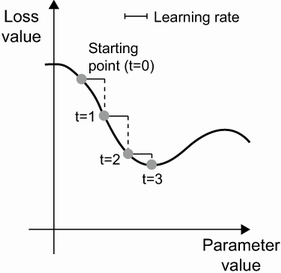


Concepto de momento en SGD:

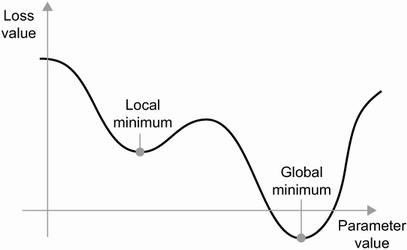



```
past_velocity = 0.
momentum = 0.1
while loss > 0.01:
    w, loss, gradient = get_current_parameters()
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)
```



Ver [optimizadores disponibles en Keras](https://keras.io/api/optimizers/#available-optimizers).

### El algoritmo de retropropagación

#### La regla de la cadena

Nuestro modelo totalmente conectado:

In [66]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Se puede descomponer en una serie de operaciones simples con derivadas directas mediante la *regla de la cadena*:


```
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, W1) + b1), W2) + b2))
```



#### Grafos de computación y derivación automática

Los **grafos de computación** son una forma de expresar explícitamente la arquitectura de los modelos de aprendizaje profundo de manera que puedan ser procesables por funciones.

Grafo inverso. Lo que dice la regla de la cadena sobre este grafo hacia atrás es que se puede obtener la derivada de un nodo con respecto a otro nodo *multiplicando las derivadas de cada arista a lo largo del camino que une los dos nodos*.

Este es el grafo de computación de nuestro modelo.

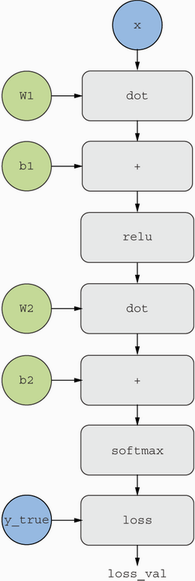

❓❓❓**EJERCICIO grafo computación**:❓❓❓ realizar una ejecución del algoritmo de retropropagación sobre este grafo de computación.

Valores de entradas y parámetros: `x=2`, `w=3`, `b=1`, `y_true=4`.

- *forward pass*: ¿Qué valor final tiene `loss_val`?
- *backward pass*: ¿Qué valor tiene el gradiente de cada parámetro?
- ¿Qué valor tiene la derivada completa aplicando la regla de la cadena? `grad(loss_val, w) = grad(loss_val, x2) * grad(x2, x1) * grad(x1, w)`
- ¿Dónde pondrías este valor en el algoritmo SGD que hemos visto?

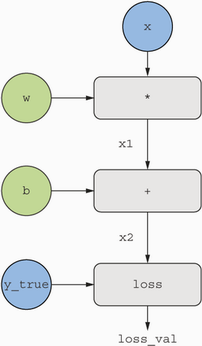

In [86]:
# No hay que hacerlo?
import numpy as np

# Forward pass
x = 2 # entrada
w = 3 # peso
b = 1 # bias = sesgo
y_true = 4 # ground truth

# Calcular la predicción del modelo
y_pred = x * w + b

# Calcular la función de pérdida (loss)
loss_val = (y_true - y_pred) ** 2 / 2

print("Valor final de loss_val:", loss_val)

Valor final de loss_val: 4.5


#### Diferenciación automática (gradient tape en TensorFlow)

Hoy en día la gente implementa redes neuronales con herramientas modernas que son capaces de diferenciar automáticamente, como TensorFlow. La diferenciación automática se implementa con el tipo de grafo de computación que acabamos de ver. Ésta permite calcular los gradientes de composiciones arbitrarias de operaciones con tensores diferenciables sin hacer nada más que escribir el pase hacia delante (*forward pass*).

TensorFlow implementa la diferenciación automática a través del API `GradientTape`. `GradientTape` permite obtener el gradiente de cualquier salida con respecto a cualquier variable o conjunto de variables (ej. `tf.Variable`).

Evaluar el gradiente de la función ` y = 2 * x + 3` en el punto `x = 0.0`

In [67]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

tf.Tensor(2.0, shape=(), dtype=float32)


In [68]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [69]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b # matmul igual a dot en numpy
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_x)


tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


❓❓❓**EJERCICIO**: Comprueba el resultado de tus cálculos con esta herramienta❓❓❓

## Vuelta al modelo de ejemplo inicial

Después de las secciones anteriores tenemos una idea general de qué hay detrás de las redes neuronales profundas.

Relaciones entre capas de la red, función de pérdida y optimizador.

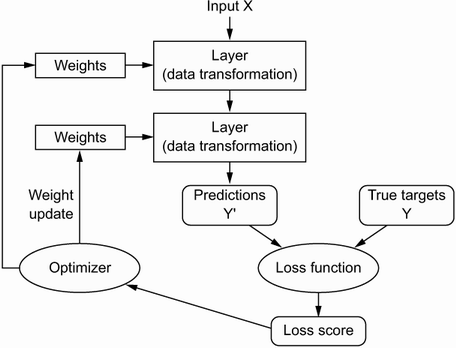


Revisitemos el ejemplo inicial.

Estos eran los datos de entrada.

❓❓❓¿Cómo se almacenan las imágenes de los datos de entrenamiento y test? ❓❓❓

In [70]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

- `train_images`: Es un array numpy que contiene las imágenes de entrenamiento del conjunto de datos mnist. Estas imágenes están almacenadas en una matriz 3D. Estas imágenes son ajustadas con la función `reshape` a una forma 2D donde cada fila contiene los píxeles de una imagen. En este caso, cada imagen es de tamaño 28x28 píxeles, por lo que después del `reshape`, `train_images` tendrá una forma de (60000, 784), lo que significa que hay 60000 imágenes de entrenamiento y cada imagen se ha aplanado a un vector de longitud 784 (28x28).

- `test_images`: Similar a `train_images`, es un array numpy que contiene las imágenes de test. También se ajusta su forma de la misma manera que las imágenes de entrenamiento a una forma 2D de (10000, 784), lo que indica que hay 10000 imágenes de prueba, cada una representada como un vector de longitud 784.

En ambos casos, después del reajuste, los valores de los píxeles de las imágenes se normalizan con la función `astype("float32") / 255` para que estén en el rango [0, 1], lo que facilita el cálculo matemático durante el entrenamiento en deep learning.

Nuestro modelo está compuesto de una cadena de dos capas `Dense` y que cada una aplica unas operaciones simples a los datos de entrada, y que estas operaciones implican tensores de pesos.

In [71]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Compilación del modelo. Ahora podemos entender que `sparse_categorical_crossentropy` es la función de pérdida que se usa como señal de feedback para el aprendizaje del los tensores de pesos y que el algoritmo de aprendizaje intentará minimizar.

In [72]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Finalmente, el bucle de entrenamiento.

---
❓❓❓**EJERCICIO**¿qué significa `epoch`?¿Qué pasará al ejecutar fit con estos parámetros?¿cuántas actualizaciones del gradiente se producirán con este conjunto de entrenamiento❓❓❓

En el contexto del método `fit()` en Keras, el parámetro `epochs` (épocas) se refiere al número de veces que el algoritmo de entrenamiento recorrerá todo el conjunto de datos de entrenamiento durante el proceso de optimización. Cada época consiste en un ciclo completo de avance (forward pass) y retroceso (backward pass) a través de todos los datos de entrenamiento, donde los pesos del modelo se ajustan según el algoritmo de optimización.

En este caso, los hiperparámetros configurados quieren decir que el modelo se entrenará durante 5 épocas. Durante cada época, el conjunto de datos de entrenamiento completo se dividirá en `batches` (lotes) de 128. El algoritmo de optimización actualizará los pesos del modelo después de cada `batch` procesado. Por lo tanto, el modelo pasará por el conjunto de datos de entrenamiento completo 5 veces, actualizando los pesos después de cada `batch`.

Como el conjunto de entrenamiento tiene 60000 imágenes y el tamaño del `batch` es 128, el número total de lotes por época sería aproximadamente 469 (60000 / 128 ≈ 468.75). Por lo tanto, en 5 épocas, habrá aproximadamente 2345 actualizaciones del gradiente (469 lotes/época * 5 épocas ≈ 2345 actualizaciones).

In [73]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 12s 23ms/step - loss: 0.2662 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 8s 18ms/step - loss: 0.1096 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0719 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0518 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0394 - accuracy: 0.9882


## Resumen

* Los *tensores* constituyen las bases de los métodos de aprendizaje máquina modernos.
* Los tensores numéricos se pueden manipular a través de *operaciones de tensores* (suma, producto, multiplicación elemento a elemento...).
* Los modelos de aprendizaje profundo consisten en una cadena de operaciones de tensores sencillas parametrizadas por los *pesos*, que también son tensores. Los pesos de un modelo es donde se recoge el "conocimiento" del problema.
* En este contexto, *aprender* significa encontrar un conjunto de valores para los pesos del modelo que minimizan una *función de pérdida* para un conjunto de patrones de entrenamiento y sus etiquetas.
* Descenso por gradiente estocástico con mini-lotes (mini-batch stochastic gradient descent).
* El proceso de aprendizaje es posible porque todas las operaciones de tensores en las redes son diferenciables.
* Conceptos clave: pérdida o *loss* y optimizadores.
